<a href="https://colab.research.google.com/github/rich-hyun/Kuggle_9th_team_SAMTARBUCKS/blob/main/%EB%B6%84%EB%A5%98_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
!pip install nltk

In [70]:
import pandas as pd
from datetime import datetime
import calendar

# 데이터 로딩
df = pd.read_csv('https://raw.githubusercontent.com/rich-hyun/Kuggle_9th_team_/main/reviews_data.csv',  encoding='utf-8')

# 'Date' 열에서 월, 일, 연도를 추출하여 새로운 열에 저장
# 'Reviewed' 다음에 오는 단어를 'mnth' 열에 저장
df['mnth'] = df['Date'].str.extract(r'Reviewed\s+([A-Za-z]+)')
df['day'] = df['Date'].str.extract(r'(\d{1,2}),').astype('int')
df['year'] = df['Date'].str.extract(r'(\d{4})').astype('int')

# 월 이름을 숫자로 매핑하는 딕셔너리 생성
months_map = {
    'Jan': 1, 'Feb': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'Aug': 8, 'Sept': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}

# 'mnth' 열의 월 이름을 숫자로 변환
df['mnth_num'] = df['mnth'].map(months_map)

# 월 이름을 숫자로 매핑하는 딕셔너리 생성
month_mapping = {v: k for k,v in enumerate(calendar.month_name)}

# 월 이름을 월 번호로 변환
df['month_num'] = df['mnth'].map(month_mapping)

# 날짜로부터 요일을 계산하여 'day2' 열에 저장
df['day2'] = df.apply(lambda row: datetime.strptime(f"{row['year']}-{row['mnth_num']}-{row['day']}", '%Y-%m-%d').strftime('%A'), axis=1)

# 요일 이름을 숫자로 매핑하는 딕셔너리 생성
day_to_num = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}

# 'day2' 열의 요일 이름을 숫자로 변환
df['day2_num'] = df['day2'].map(day_to_num)

# 원하는 열만 선택 (새로운 'day2_num' 열을 포함하도록 업데이트)
df = df[['name', 'location', 'Date', 'year', 'mnth_num', 'day', 'day2_num', 'Rating', 'Review']]

# 'Rating' 또는 'Review'가 NaN인 행을 제거
df_cleaned = df.dropna(subset=['Rating', 'Review'], inplace = True)

df.head()

,name,location,Date,year,mnth_num,day,day2_num,Rating,Review
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",2023,9,13,2,5.0,Amber and LaDonna at the Starbucks on Southwes...
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",2023,7,16,6,5.0,** at the Starbucks by the fire station on 436...
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",2023,7,5,2,5.0,I just wanted to go out of my way to recognize...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",2023,5,26,4,5.0,Me and my friend were at Starbucks and my card...
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",2023,1,22,6,5.0,I?셫 on this kick of drinking 5 cups of warm wa...


In [ ]:
!pip install transformers
from transformers import pipeline
classifier = pipeline("sentiment-analysis", model="michellejieli/emotion_text_classifier")
classifier("I love this!")

[{'label': 'joy', 'score': 0.9887555241584778}]

In [ ]:
from transformers import pipeline
sentiment_analysis = pipeline("sentiment-analysis",model="siebert/sentiment-roberta-large-english")
print(sentiment_analysis("I love this!"))

[{'label': 'POSITIVE', 'score': 0.9988656044006348}]


In [ ]:
!pip install transformers

from transformers import pipeline
classifier = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", return_all_scores=True)
classifier("I love this!")

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:105: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


[[{'label': 'anger', 'score': 0.004419787786900997},
  {'label': 'disgust', 'score': 0.001611991785466671},
  {'label': 'fear', 'score': 0.0004138524236623198},
  {'label': 'joy', 'score': 0.9771687984466553},
  {'label': 'neutral', 'score': 0.005764591973274946},
  {'label': 'sadness', 'score': 0.002092393347993493},
  {'label': 'surprise', 'score': 0.008528684265911579}]]

###**EDA**

In [71]:
df

,name,location,Date,year,mnth_num,day,day2_num,Rating,Review
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",2023,9,13,2,5.0,Amber and LaDonna at the Starbucks on Southwes...
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",2023,7,16,6,5.0,** at the Starbucks by the fire station on 436...
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",2023,7,5,2,5.0,I just wanted to go out of my way to recognize...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",2023,5,26,4,5.0,Me and my friend were at Starbucks and my card...
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",2023,1,22,6,5.0,I?셫 on this kick of drinking 5 cups of warm wa...
...,...,...,...,...,...,...,...,...,...
696,Margaret,"Cotati, CA","Reviewed Oct. 2, 2011",2011,10,2,6,1.0,I ordered Via Starbucks coffee online. I recei...
697,Ric,"Oakville, ON","Reviewed Aug. 31, 2011",2011,8,31,2,3.0,"My name is Ric **, I am journalist by professi..."
698,Jayne,"Ny, NY","Reviewed Aug. 24, 2011",2011,8,24,2,1.0,"The bagel was ice cold, not cut and not toasted."
699,Norma,"La Puente, CA","Reviewed Aug. 15, 2011",2011,8,15,0,1.0,"In the morning of Monday, August 15, 2011, at ..."


In [72]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 701 entries, 0 to 745
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      701 non-null    object 
 1   location  701 non-null    object 
 2   Date      701 non-null    object 
 3   year      701 non-null    int64  
 4   mnth_num  701 non-null    int64  
 5   day       701 non-null    int64  
 6   day2_num  701 non-null    int64  
 7   Rating    701 non-null    float64
 8   Review    701 non-null    object 
dtypes: float64(1), int64(4), object(4)
memory usage: 54.8+ KB


In [74]:
df.describe()

,year,mnth_num,day,day2_num,Rating
count,701.000000,701.000000,701.000000,701.000000,701.000000
mean,2016.965763,6.857347,15.475036,2.958631,1.874465
std,3.231359,3.373369,8.956308,1.960248,1.400486
min,2010.000000,1.000000,1.000000,0.000000,1.000000
25%,2015.000000,4.000000,7.000000,1.000000,1.000000
50%,2017.000000,7.000000,15.000000,3.000000,1.000000
75%,2019.000000,10.000000,23.000000,5.000000,2.000000
max,2023.000000,12.000000,31.000000,6.000000,5.000000


In [75]:
df.isnull().sum()

name        0
location    0
Date        0
year        0
mnth_num    0
day         0
day2_num    0
Rating      0
Review      0
dtype: int64

In [76]:
df.columns

Index(['name', 'location', 'Date', 'year', 'mnth_num', 'day', 'day2_num',
       'Rating', 'Review'],
      dtype='object')

<ipython-input-78-bd1cb6f6185e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['year'])
<ipython-input-78-bd1cb6f6185e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['mnth_num'])
<ipython-input-78-bd1cb6f6185e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed 

<Axes: xlabel='Rating', ylabel='Density'>

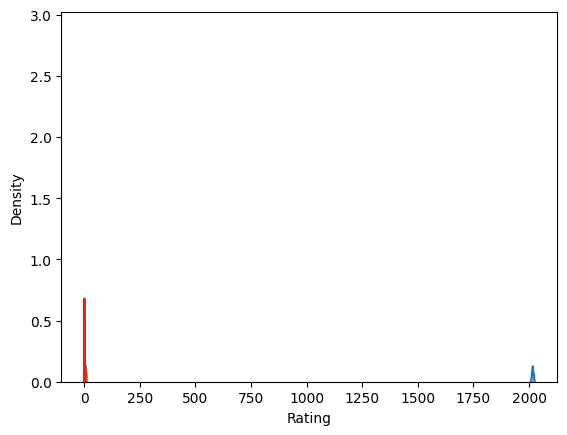

In [78]:
sns.distplot(df['year'])
sns.distplot(df['mnth_num'])
sns.distplot(df['day2_num'])
sns.distplot(df['Rating'])